In [37]:
import pandas as pd
import numpy as np
import sklearn

df = pd.read_csv('train_credit.csv')

Variable Name                                    --                              DescriptionType
SeriousDlqin2yrs                                 -- Person experienced 90 days past due delinquency or worse (Y/N)
RevolvingUtilizationOfUnsecuredLines                Total balance on credit cards and personal lines of credit except real                                                           estate and no installment debt(percentage)
age                                                 Age of borrower in years (integer)
NumberOfTime30-59DaysPastDueNotWorse             -- Number of times borrower has been 30-59 days past due but no worse in the                                                       last 2 years.(integer)

DebtRatio                                           Monthly debt payments, alimony,living costs divided by monthy gross income                                                       percentage

MonthlyIncome                                       Monthly income(real)

NumberOfOpenCreditLinesAndLoans                     Number of Open loans (installment like car loan or mortgage) and Lines of                                                       credit (e.g. credit cards)(integer)
NumberOfTimes90DaysLate                             Number of times borrower has been 90 days or more past due.(integer)
NumberRealEstateLoansOrLines                        Number of mortgage and real estate loans including home equity lines of                                                         credit(integer)

NumberOfTime60-89DaysPastDueNotWorse                Number of times borrower has been 60-89 days past due but no worse in the                                                       last 2 years.(integer)
NumberOfDependents                                  Number of dependents in family excluding themselves (spouse, children etc.)
                                                    (integer)

In [38]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [39]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
df.head()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                 1                              0.766127   45   
1                 0                              0.957151   40   
2                 0                              0.658180   38   
3                 0                              0.233810   30   
4                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

In [5]:
df.describe()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                                4.192781    2037.818523   1.438467e+04   
min                                0.000000       0.000000   0.000000e+00   
25%                                0.000000       0.175074   3.400000e+03   
50%                                0.000000       0.366508   5.400000e+03   
75%                                0.000000       0.868254   8.249000e+03   
max                               98.000000  329664.000000   3.008750e+06   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                    150000.000000            150000.000000   
mean                          8.452760                 0.265973   
std                           5.145951                 4.169304   
min                           0.000000                 0.000000   
25%                           5.000000                 0.000000   
50%                           8.000000                 0.000000   
75%                          11.000000                 0.000000   
max                          58.000000                98.000000   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
count                 150000.000000                         150000.000000   
mean                       1.018240                              0.240387   
std                        1.129771                              4.155179   
min                        0.000000                              0.000000   
25%                        0.000000                              0.000000   
50%                        1.000000                              0.000000   
75%                        2.000000                              0.000000   
max                       54.000000                             98.000000   

       NumberOfDependents  
count       146076.000000  
mean             0.757222  
std              1.115086  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max             20.000000

In [6]:

from pandas_profiling import ProfileReport 
ProfileReport(df)


Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

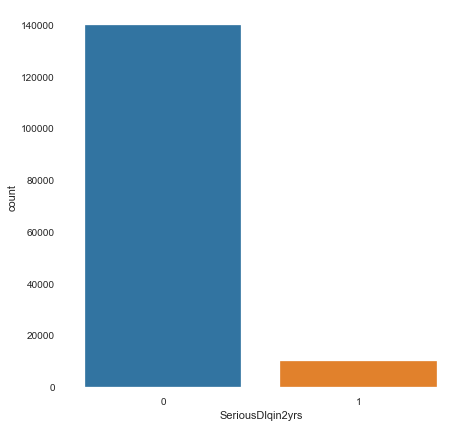

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.countplot(df['SeriousDlqin2yrs'])

In [41]:
df.loc[df['SeriousDlqin2yrs']==1]

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                      1                              0.766127   45   
13                     1                              0.964673   40   
21                     1                              0.025656   38   
25                     1                              0.392248   50   
51                     1                              0.728150   31   
...                  ...                                   ...  ...   
149954                 1                              1.000000   46   
149955                 1                              1.135552   41   
149961                 1                              0.920107   31   
149968                 1                              0.983825   55   
149979                 1                              0.224711   55   

        NumberOfTime30-59DaysPastDueNotWorse   DebtRatio  MonthlyIncome  \
0                                          2    0.802982         9120.0   
13                                         3    0.382965        13700.0   
21                                         0    0.475841         3000.0   
25                                         0    1.595253         4676.0   
51                                         0    0.824725         3000.0   
...                                      ...         ...            ...   
149954                                     0  170.398010          401.0   
149955                                     2    0.845887         7500.0   
149961                                     1    0.176732         1125.0   
149968                                     0    0.064116         4600.0   
149979                                     0    0.057235         8700.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                    13                        0   
13                                    9                        3   
21                                    7                        0   
25                                   14                        0   
51                                   10                        0   
...                                 ...                      ...   
149954                                3                        2   
149955                               12                        0   
149961                                4                        1   
149968                                2                        1   
149979                                7                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                                  6                                     0   
13                                 1                                     1   
21                                 1                                     0   
25                                 3                                     0   
51                                 2                                     0   
...                              ...                                   ...   
149954                             0                                     0   
149955                             4                                     1   
149961                             0                                     0   
149968                             0                                     0   
149979                             0                                     0   

        NumberOfDependents  
0                      2.0  
13                     2.0  
21                     2.0  
25                     1.0  
51                     1.0  
...                    ...  
149954                 2.0  
149955                 0.0  
149961                 0.0  
149968                 6.0  
149979                 0.0  

[10026 rows x 11 columns]

In [17]:
#HIGLY IMBALANCED DATASET


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text major ticklabel objects>)

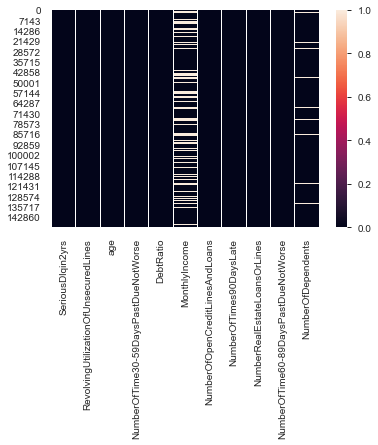

In [18]:

sns.heatmap(df.isnull())
plt.xticks(rotation=90)

In [23]:
from sklearn.impute import SimpleImputer

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='age'>

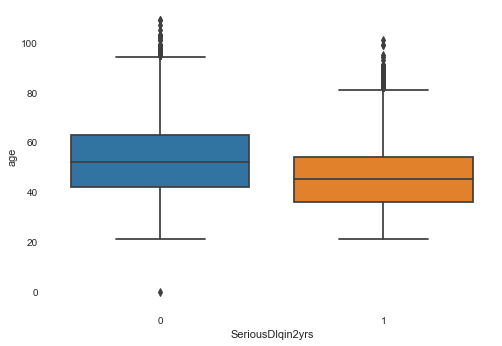

In [42]:
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
sns.boxplot(x = df['SeriousDlqin2yrs'], y = df['age'])

In [43]:
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [44]:
df['NumberOfDependents'] = imp.fit_transform(df[['NumberOfDependents']])

In [45]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
dtype: int64

In [102]:
from sklearn.utils import resample

In [117]:
add = resample(x,n_samples = 125000)

In [114]:
x = np.array(df.loc[df['SeriousDlqin2yrs']==1]).shape

In [120]:
df = pd.concat([df,pd.DataFrame(add)],axis = 0)

In [121]:
df.shape

(275000, 12)

In [122]:
#I have imputed using simple mean

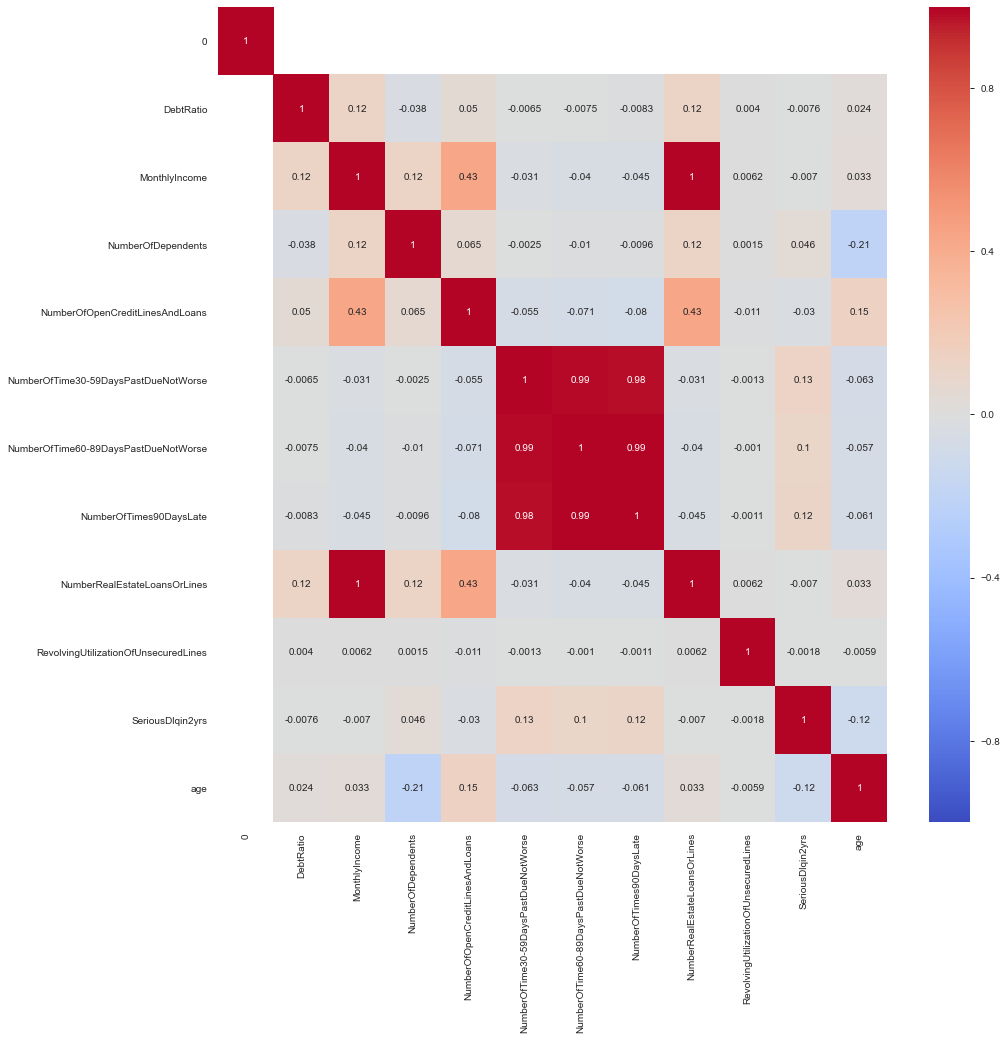

In [123]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm',vmin = -1)

In [46]:
from sklearn.linear_model import LinearRegression
data = df[['NumberRealEstateLoansOrLines','MonthlyIncome']].dropna()
y1 = data[['MonthlyIncome']]
x1 = data[['NumberRealEstateLoansOrLines']]
modelx = LinearRegression()

In [47]:
modelx.fit(x1,y1)

LinearRegression()

In [48]:
def imputeMI(column):
    NUMREAL = column[0]
    MI  = column[1]
    if MI == 0 or np.nan:
        return int(modelx.predict([[NUMREAL]]))
    else:
        return MI

In [49]:
df['MonthlyIncome'] = df[['NumberRealEstateLoansOrLines','MonthlyIncome']].apply(imputeMI,axis=1)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

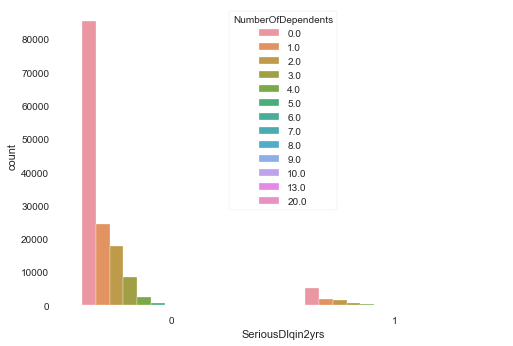

In [50]:


sns.countplot(df['SeriousDlqin2yrs'],hue  = df['NumberOfDependents'])

In [51]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [52]:
X = df.drop('SeriousDlqin2yrs',axis=1)
y = df[['SeriousDlqin2yrs']]


from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_

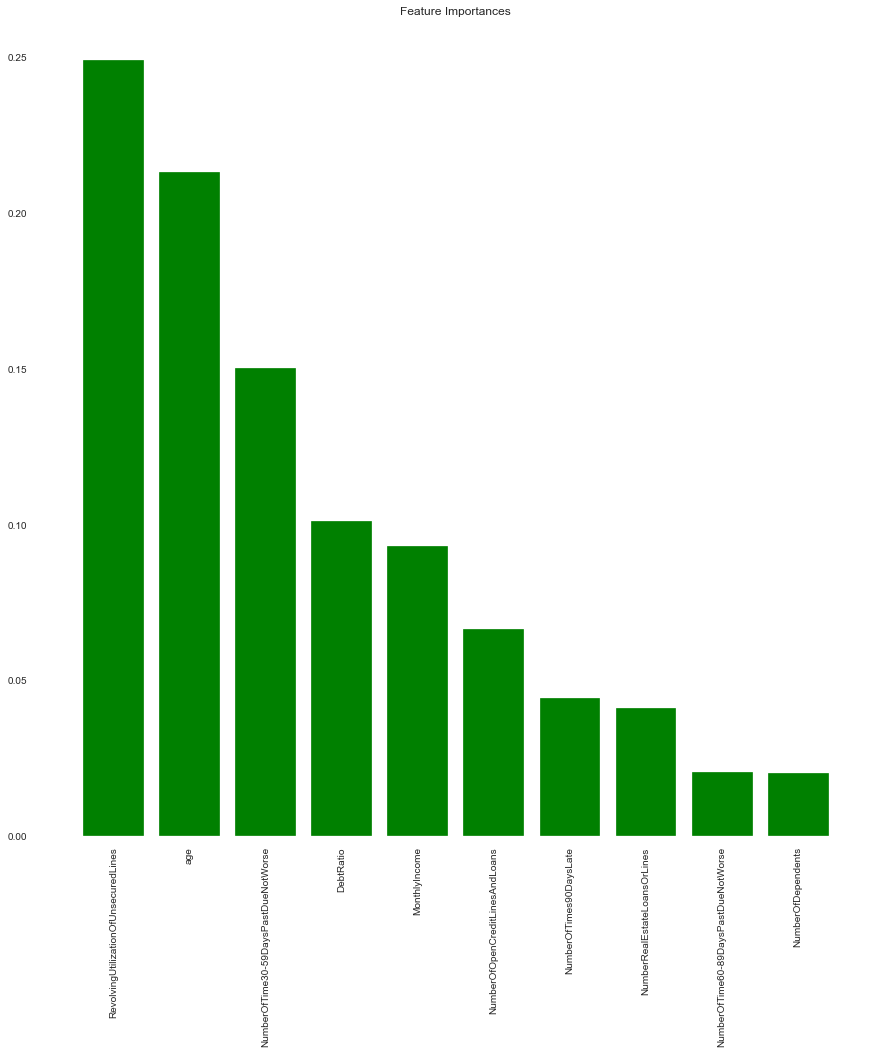

In [53]:
features_label = df.columns[1:]
plt.figure(figsize = (15,15))
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [54]:
from sklearn.linear_model import LogisticRegression


In [55]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df.SeriousDlqin2yrs

In [56]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 49)

In [57]:
log_model = LogisticRegression()

In [58]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_pred = log_model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[41962    31]
 [ 2969    38]]


In [60]:
from sklearn.metrics import precision_score , recall_score , f1_score, accuracy_score, classification_report

In [ ]:
def metrics(y_test,y_pred):
    
    print('Accuracy is\n',accuracy_score(y_test, y_pred))
          
    print('Precision is\n',precision_score(y_test, y_pred))
    print('Recall is\n',recall_score(y_test, y_pred))
    print('F1 Score is\n',f1_score(y_test, y_pred))
    print('Confusion Matrix is\n\n ',confusion_matrix(y_test, y_pred),'\n')
    print('Classification Report\n\n', classification_report(y_test,y_pred))

In [ ]:
metrics(y_test,y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_model  = KNeighborsClassifier()

In [ ]:
k_model.fit(X_train,y_train)

In [ ]:
ky_pred = k_model.predict(X_test)

In [ ]:
metrics(ky_pred,y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_model = RandomForestClassifier()

In [ ]:
rand_model.fit(X_train,y_train)

In [ ]:
yr_pred = rand_model.predict(X_test)

In [ ]:
metrics(yr_pred,y_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model = AdaBoostClassifier()

In [ ]:
ada_model.fit(X_train,y_train)

In [ ]:
yada_pred = ada_model.predict(X_test)

In [ ]:
metrics(yada_pred, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_model = GradientBoostingClassifier()

In [ ]:
grad_model.fit(X_train,y_train)

In [ ]:
grad_pred = grad_model.predict(X_test)

In [ ]:
metrics(grad_pred, y_pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import pickle 

In [ ]:
pickle.dump(ada_model,open('credit_model.pkl','wb'))

In [ ]:
from joblib import dump, load
dump(k_model, 'cred_model.joblib') 

In [ ]:
pip install joblib

In [ ]:
pip install sklearn

In [ ]:
pip install "scikit_learn==0.22.2.post1"